Press Ctrl C together anytime to end analysis 

Length of recording in seconds:  58
Total number of data points:  587090
Sampling rate in Hertz:  10000.0
Time step in milliseconds:  0.1
Maximum absolute height of spikes 0.66595458984375


*************   Selection parameters *********************


1: Height 2: Negative height 

3: Half positive width 4: Full positive width 

5: Half negative width 6: Full negative width  

7: Positive area 8: Negative area 9: Total area

10: Distance between positive and negative peaks 

********************************************************** 



Enter 0 for manual selection or 1 to use Principal Component Analysis 1
Enter 1 to plot total signal, 0 to continue 1


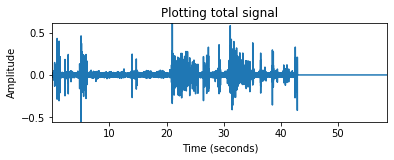

<Figure size 432x288 with 0 Axes>

Start time needs to be greater than 0 and less than total time 58
Enter start time (in seconds) to begin analysis16
End time needs to be greater than start time d and less than total time 16 58
Enter end time (in seconds) at which to end analysis 30
Spike threshold needs to be greater than 0 and less than the maximum spike height 0.66595458984375
Enter minimum threshold for spikes to be considered for analysis .16
Threshold in spike sorting algorithm 0.16
Extracting recording from start time to end time


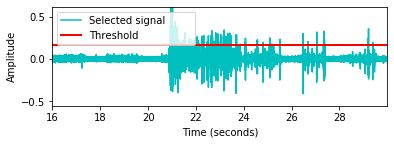

Are you satisfied with your choice of the spike threshold and start and end times for analysis? 

Enter 0: No (program will end and can be rerun) OR 1: Yes 1
Finding location of peaks 

Number of peaks above threshold 
 
 121
Coefficient of variation of Positive spike height [0.3398919]
Coefficient of variation of Negative spike height [0.70905586]
Coefficient of variation of Positive half-width [7.77823116]
Coefficient of variation of Positive full-width [0.29732996]
Coefficient of variation of Negative half-width [0.56041358]
Coefficient of variation of Negative full-width [0.55534028]
Coefficient of variation of Positive area [0.3855902]
Coefficient of variation of Negative area [0.86472434]
Coefficient of variation of Total area [0.44588803]
Coefficient of variation of Time between peaks [nan]


First selection criteria  PCA Score 1
Second selection criteria  PCA Score 2


Normalizing scores by subtracting mean and dividing by standard deviation 

Begin clustering algorithm 

Findi

C:\Users\narnu\anaconda3\lib\site-packages\ipykernel_launcher.py:341: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\narnu\anaconda3\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\narnu\anaconda3\lib\site-packages\ipykernel_launcher.py:490: RuntimeWarning: invalid value encountered in subtract


End finding distances between scores 

Adding points to cluster 
 1


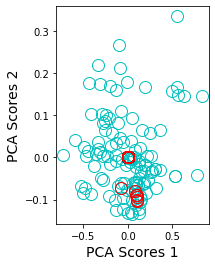

Horizontal and vertical range of cluster scores:
 1 red [0.19013263] [0.21184016]
Number of points in cluster  is  
 1 7
Refer to figure.  Add to cluster?  Yes: 1, No: 0 to stop adding points to cluster 0


IndexError: index 7 is out of bounds for axis 0 with size 7

In [3]:
###### Import Libraries
import numpy as np
import math 
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import scipy.io.wavfile as wav
from scipy.io.wavfile import read as read_wav
import os
import soundfile as sf

'''Read Recording'''

filename="VNC_recording.wav" #Change to filename

os.chdir(r"D:\Ricoy") # change to the file directory
ya, fs = sf.read(filename) #Input the .wav file recording

dt = 1./fs #Time between recordings 
n = len(ya) #Number of recordings

totaltime = int(n*dt)         #Total time of recording 
print('Press Ctrl C together anytime to end analysis \n')
print('Length of recording in seconds: ',totaltime)
print('Total number of data points: ',n)
print('Sampling rate in Hertz: ',1.0/dt)
print('Time step in milliseconds: ',1000*dt)        #Print recording properties

'''End: Read in recording'''

yamax = max(abs(ya));

print('Maximum absolute height of spikes',yamax)  #Maximum absolute height of spikes
     
'''Set parameters for analysis'''
 
num_selections = 2 # Number of features to use for spike sorting
#totalsignal = 0 # Set totalsignal = 1 to plot the entire recording

#Parameter which manages addition of points to cluster, Suggested range: [.25,1.5]
fraction_radius_group_orig = .6
fraction_radius_group = fraction_radius_group_orig

#Parameter which manages distance between clusters, Suggested range: [.25,1]
fraction_radius_all_scores_orig = 0.5
fraction_radius_all_scores = fraction_radius_all_scores_orig

# Parameter which regulates the minimum distance the points of one cluster
#can be to another cluster
minimum_distance_cluster_parameter_orig = .125
minimum_distance_cluster_parameter_orig = .25
minimum_distance_cluster_parameter = minimum_distance_cluster_parameter_orig

ijump = 10  #Gap between spike data to read 

# Spike features to select from to do analysis
print('\n')
print('*************   Selection parameters *********************')
print('\n')
print('1: Height 2: Negative height \n');
print('3: Half positive width 4: Full positive width \n');
print('5: Half negative width 6: Full negative width  \n');
print('7: Positive area 8: Negative area 9: Total area\n');
print('10: Distance between positive and negative peaks \n');
print('********************************************************** \n')
print('\n')

stra=np.array(['Positive spike height','Negative spike height','Positive half-width','Positive full-width',
'Negative half-width','Negative full-width','Positive area','Negative area','Total area'
,'Time between peaks','PCA Score 1','PCA Score 2'])   #Spike properties to display stored in array called stra

pca_temp = -1
nit = 0
while (pca_temp != 0 and pca_temp != 1):
   nit = nit + 1
   if (nit > 1):
      print('Please enter 0 or 1')  
   pca_temp = int(input('Enter 0 for manual selection or 1 to use Principal Component Analysis '))
pca = pca_temp

selection=np.zeros((10,1))
if (pca == 0):
    for ijk in [0,1]:
        if (ijk == 0):
           iii = 0
           while (iii > 10 or iii < 1):
              iii = int(input('Enter number for selection criteria 1: '))
              print('Value needs to be between 1 and 10 \n')
           selection[ijk] = iii
        else:
           iii = 0
           while (iii > 10 or iii < 1):
              iii = int(input('Enter number for selection criteria 2: '))
              print('Value needs to be between 1 and 10 \n')
           selection[ijk] = iii 

if (pca == 1):
   selection[0] = 11
   selection[1] = 12

#End: Set parameters for analysis 

#Plot recording, Select start and end times for analysis

totalsignal = int(input('Enter 1 to plot total signal, 0 to continue '))

if (totalsignal == 1): 
   ifirst = int(1)
   ilast = int(n)
   if (n > 1000000):
      print('Since the recording is very large' ,n)
      print('Plot every d points of recording',ijump)
      ijump = int(10)
   
   xpkt = np.arange(ifirst,ilast,ijump)
   ypkt = ya[np.arange(ifirst-1,ilast,ijump)]
   xpkt1 = np.reshape(xpkt, (len(xpkt), 1))
   xpkt = xpkt1*dt
   axmin = float(ifirst)*dt
   axmax = float(ilast)*dt
   ypkmin = min(ypkt)
   ypkmax = max(ypkt)
   matplotlib.pyplot.subplot(2,1,1)
   plt.plot(xpkt,ypkt)
   plt.axis([axmin, axmax, ypkmin, ypkmax])   
   plt.title("Plotting total signal")
   plt.xlabel("Time (seconds)")
   plt.ylabel("Amplitude")
   plt.figure()
   plt.show()

starttime_temp = -1

while (int(starttime_temp) < int(0) or int(starttime_temp) >= int(totaltime)):
    print('Start time needs to be greater than 0 and less than total time',totaltime)
    starttime_temp = int(input('Enter start time (in seconds) to begin analysis'))
starttime = starttime_temp
endtime_temp = starttime
while(int(endtime_temp) <= int(starttime) or int(endtime_temp) > int(totaltime)):
    print('End time needs to be greater than start time d and less than total time',starttime,totaltime)
    endtime_temp = int(input('Enter end time (in seconds) at which to end analysis '))
endtime = endtime_temp
threshold_temp = -1.
while (float(threshold_temp)< float(0) or float(threshold_temp) > float(yamax)):
    print('Spike threshold needs to be greater than 0 and less than the maximum spike height',yamax)
    threshold_temp = float(input('Enter minimum threshold for spikes to be considered for analysis '))
threshold = threshold_temp
    
print('Threshold in spike sorting algorithm' ,threshold)
  
mstart=int(np.floor(max(np.floor(starttime/dt)+1,2))) # Beginning integer recording value corresponding to start time

mfinish = int(np.floor(endtime/dt)) # End integer recording value corresponding to end time

ioverlay = 1 #Set overlay = 1 to create plot of overlayed spikes

print('Extracting recording from start time to end time')
minypk = 1e20
maxypk = -1e20

xpk=np.arange(mstart*dt-dt,mfinish*dt,dt)
xpk=np.reshape(xpk, (len(xpk), 1))
ypk = ya[mstart-1:mfinish:1]
ypk=np.reshape(ypk, (len(ypk), 1))

nelem = mfinish - mstart + 1
if (nelem > 1000000):
  ijump_selection = 10
else:
  ijump_selection = 1

xpk_plot = xpk[0:nelem:ijump_selection]
ypk_plot = ypk[0:nelem:ijump_selection]


if (totalsignal == 1):
   plt.plot(xpk_plot,ypk_plot,'c-')
   plt.axis([axmin,axmax,ypkmin,ypkmax])  

xp_threshold = np.zeros((2,1))
xp_threshold[0] = xpk[1]
yp_threshold  = np.zeros((2,1))
yp_threshold[0] = threshold
xp_threshold[1] = xpk[mfinish-mstart-1]
yp_threshold[1] = threshold
if (totalsignal == 1):
   matplotlib.pyplot.matplotlib.pyplot.subplot(2,1,2)

plt.plot(xpk_plot,ypk_plot,'c-') 
if (totalsignal == 1):
   plt.axis([min(xpk_plot),max(xpk_plot),ypkmin,ypkmax])
            
plt.plot(np.array(list(xp_threshold)),np.array(list(yp_threshold)),'r-',linewidth=2)
plt.legend(['Selected signal        ','Threshold','Orientation','horizontal','Location','South'],loc='upper left')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

print('Are you satisfied with your choice of the spike threshold and start and end times for analysis? \n')
ithreshold = int(input('Enter 0: No (program will end and can be rerun) OR 1: Yes '));

### End: Plot recording, Select start and end times for analysis

'''Find location of peaks'''

print('Finding location of peaks \n') 

istart = 0
ilocation = 0
ypkmax = 0
ijk = 0

peak = np.zeros((mfinish-mstart+1,1)) # Stores the recordings where the peaks occur
ya = np.reshape(ya, (len(ya), 1))

peak_pre=np.zeros((100000,1))
height_pre=np.zeros((100000,1))
peak_int=np.zeros((100000,1))

for i in np.arange(mstart, mfinish+1) : 
    if (abs(ya[i,0]) < threshold):
       istart = 1
    if (abs(ya[i,0]) > threshold and istart == 1):
       if (abs(ya[i,0]) > ypkmax):
          ypkmax = abs(ya[i,0])
          ilocation = i
    if (ilocation > 0):
       if (abs(ya[i-1,0]) >= .5*threshold and abs(ya[i,0]) <= .5*threshold and istart == 1):
          ijk = ijk + 1
          
          if (np.mod(ijk,400) == 0):
             print('Number of peaks (positive or negative) found above threshold \n',ijk)
          peak_pre[ijk-1] = ilocation+1
          height_pre[ijk-1] = ya[ilocation,0]

          facya = .5*(ya[ilocation+1,0] - ya[ilocation-1,0])/(ya[ilocation+1,0]-2.0*ya[ilocation,0]+ya[ilocation-1,0])
          peak_int[ijk-1] = dt*(float(ilocation) - facya)
                    
          ypkmax = 0
          ilocation = 0
          istart = 0
        
npeaks = ijk
ifilter = 0
height=np.zeros((npeaks,1))

for ijk in range(0,npeaks):
    if (height_pre[ijk] > 0.0):
       ifilter = ifilter + 1
       peak[ifilter-1] = peak_pre[ijk]
       height[ifilter-1] = height_pre[ijk]
    else:
       iloc = peak_pre[ijk]
       if (ijk + 1 <= npeaks):
          iloc_ahead = peak_pre[ijk+1]
       else:
          iloc_ahead = -100000
       if (ijk - 1 >= 1):
          iloc_before = peak_pre[ijk-1]
       else:
          iloc_before = -100000
       time_ahead = float(iloc_ahead - iloc)*dt/1000. # time to next spike in ms
       time_before = float(iloc - iloc_before)*dt/1000. # time to previous spike in ms
       if (time_ahead <= 2.0 or time_before <= 2.0):
          too_close = 1 # Spike is within 2 ms of another spike
       else:
          too_close = 0
       max_allowed = np.floor(1.5/(dt*1000)) # Positive peak needs to be within 1.5 ms
       if (too_close == 0):
          # Search for positive peak
          ii = iloc
          ypkmax = 0.0
          ilocation = 0
          while (ii <= max_allowed):
              if (ya[ii,0] > ypkmax and ya[ii,0] >= .5*threshold):
                 ypkmax = ya[ii,0]
                 ilocation = ii
              ii = ii + 1
          ilocation
        
npeaks = ifilter
       
print('Number of peaks above threshold \n \n',npeaks)

if (npeaks < 10):
   print('Number of peaks may be too few to do a spike sorting analysis \n')
   print('Try decreasing threshold or increasing time range \n')
   print('Ending progam \n')

firstzero=np.zeros((npeaks,1))
firstzero_int=np.zeros((npeaks,1))
beginpeak=np.zeros((npeaks,1))
beginpeak_int=np.zeros((npeaks,1))
heightnegative=np.zeros((npeaks,1))
negpeak=np.zeros((npeaks,1))
areaneg=np.zeros((npeaks,1))
negpeak_int=np.zeros((npeaks,1))
endpeak=np.zeros((npeaks,1))
endpeak_int=np.zeros((npeaks,1))
areapos=np.zeros((npeaks,1))
areatot=np.zeros((npeaks,1))
firstneg=np.zeros((npeaks,1))
firstneg_int=np.zeros((npeaks,1))
secondneg=np.zeros((npeaks,1))
secondneg_int=np.zeros((npeaks,1))
beghalfheight=np.zeros((npeaks,1))
beghalfheight_int=np.zeros((npeaks,1))
endhalfheight=np.zeros((npeaks,1))
endhalfheight_int=np.zeros((npeaks,1))
heightnegative=np.zeros((npeaks,1))

for kk in range(0,npeaks):
    ijk = 0
    firstzerol = 0
    secondpeak = 0
    heightnegative[kk] = 1E10      
          
    for j in range(int(peak[kk])-1,int(peak[kk])-200,-1) :
        if (ya[j,0] >= 0 and ya[j-1,0] <= 0 and firstzerol == 0 and secondpeak == 0):
           firstzerol = 1
           firstzero[kk] = j+1 # firstzero stores the location of first zero to left of peak
           firstzero_int[kk] = dt*( float(j-1) + (0. - ya[j-1,0])/(ya[j,0] - ya[j-1,0]) )

        if (ya[j,0] <= 0. and ya[j-1,0] >= 0. and firstzerol == 1 and secondpeak == 0):
           beginpeak[kk] = j+1 # beginpeak stores the second zero to left of peak
           beginpeak_int[kk] = dt*( float(j-1) + (0. - ya[j-1,0])/(ya[j,0] - ya[j-1,0]) )
           secondpeak = 1
    beginpeak[kk] = max(beginpeak[kk],peak[kk]-200)

    heightnegative[kk] = 1E10
    areaneg[kk] = 0
    for j in range(int(beginpeak[kk])-1,int(firstzero[kk])):
        if (ya[j,0] <= heightnegative[kk]):
           heightnegative[kk] = ya[j,0] # stores location of negative peak
           negpeak[kk] = j+1                   
        areaneg[kk] = areaneg[kk] + abs(ya[j,0])
        
    heightnegative=heightnegative[0:npeaks]             
    jlo = int(negpeak[kk])
    facya = .5*(ya[jlo+1,0] - ya[jlo-1,0])/(ya[jlo+1,0]-2.0*ya[jlo,0]+ya[jlo-1,0])
    negpeak_int[kk] = dt*(float(jlo) - facya)
    
    firstzeror = 0
    for j in range(int(peak[kk])+5-1, int(peak[kk])+100):
        #if (ya[j-1,0] >= 0. and ya[j,0] <= 0. and firstzeror == 0)
        if (ya[j,0] > ya[j-1,0] and firstzeror == 0):
           endpeak[kk] = j+1 # endpeak stores location of zero to right of peak
           facya = .5*(ya[j,0] - ya[j-2,0])/(ya[j,0]-2.0*ya[j-1,0]+ya[j-2,0])
           endpeak_int[kk] = dt*(float(j-1) - facya)
           firstzeror = 1
    endpeak[kk] = min(endpeak[kk],peak[kk]+100) 
    
    areapos[kk] = 0
    for j in range(int(firstzero[kk])-1,int(endpeak[kk])):
        areapos[kk] = areapos[kk] + abs(ya[j,0])
          
    halfheightnegative = float(.5*heightnegative[kk])
              
    for j in range(int(beginpeak[kk])-1,int(firstzero[kk])):
        if (ya[j-1,0] >= halfheightnegative and ya[j,0] <= halfheightnegative):
           firstneg[kk] = j+1 # firstneg and secondneg store locations of negative half height
           firstneg_int[kk] = dt*( float(j-1) + (halfheightnegative - ya[j-1,0])/(ya[j,0] - ya[j-1,0]))
                   
        if (ya[j-1,0] <= halfheightnegative and ya[j,0] >= halfheightnegative):
           secondneg[kk] = j+1
           secondneg_int[kk] = dt*( float(j-1) + (halfheightnegative - ya[j-1,0])/(ya[j,0] - ya[j-1,0]))
         
    halfheight = .5*height[kk]
    
    for j in range(int(firstzero[kk])-1,int(peak[kk])) :
        if (ya[j-1,0] <= halfheight and ya[j,0] >= halfheight):
           beghalfheight[kk] = j+1 # beghalfheight and endhalfheight store locations of positive half height
           beghalfheight_int[kk] = dt*( float(j-1) + (halfheight - ya[j-1,0])/(ya[j,0] - ya[j-1,0]) )
          
    for j in range(int(peak[kk]),int(endpeak[kk])):
        if (ya[j-1,0] >= halfheight and ya[j,0] <= halfheight) :
           endhalfheight[kk] = j+1 
           endhalfheight_int[kk] = dt*( float(j-1) + (halfheight - ya[j-1,0])/(ya[j,0] - ya[j-1,0]) ) 

maxdistb = -1.

for kk in range(0,npeaks):
    distancebeginpeak = peak[kk] - beginpeak[kk] 
    maxdistb = max(maxdistb,distancebeginpeak)

ap_before = .5
ap_after = .2

maxdistb = np.floor(ap_before/(1000*dt))
   
maxdiste = -1.
for kk in range(0,npeaks) :
    distanceendpeak = endpeak[kk] - peak[kk]   
    maxdiste = max(maxdiste,distanceendpeak)

maxdiste = np.floor(ap_after/(1000*dt))

halfposheightdur=np.zeros((npeaks,1))
fullposheightdur=np.zeros((npeaks,1))
halfnegheightdur=np.zeros((npeaks,1))
fullnegheightdur=np.zeros((npeaks,1))
distancepeaks=np.zeros((npeaks,1))
areatot=np.zeros((npeaks,1))

for kk in (range(0,npeaks)):
    halfposheightdur[kk] = float(endhalfheight[kk]-beghalfheight[kk])*dt
    halfposheightdur[kk] = endhalfheight_int[kk] - beghalfheight_int[kk]

    fullposheightdur[kk] = float(endpeak[kk]-firstzero[kk])*dt
    fullposheightdur[kk] = endpeak_int[kk] - firstzero_int[kk]

    halfnegheightdur[kk] = float(secondneg[kk]-firstneg[kk])*dt 
    halfnegheightdur[kk] = secondneg_int[kk] - firstneg_int[kk] 

    fullnegheightdur[kk] = float(firstzero[kk]-beginpeak[kk])*dt
    fullnegheightdur[kk] = firstzero_int[kk] - beginpeak_int[kk]
                
    distancepeaks[kk] = float(peak[kk] - negpeak[kk])*dt
    distancepeaks[kk] = peak_int[kk] - negpeak_int[kk]

    areapos[kk] = areapos[kk]*dt
    areaneg[kk] = areaneg[kk]*dt
    areatot[kk] = areapos[kk] + areaneg[kk]
    
height=height[0:npeaks]
#########################################################################            
#  End: Determining other features of action potential
#########################################################################

#########################################################################            
#  Normalize features of action potential
#########################################################################

heightmean = np.mean(height)
heightsd = np.std(height)
   
heightnegativemean = np.mean(heightnegative)
heightnegativesd = np.std(heightnegative)
   
areaposmean = np.mean(areapos)
areapossd = np.std(areapos)
   
areanegmean = np.mean(areaneg)
areanegsd = np.std(areaneg)
   
areatotmean = np.mean(areatot)
areatotsd = np.std(areatot)
   
halfposheightdurmean = np.mean(halfposheightdur)
halfposheightdursd = np.std(halfposheightdur)
   
fullposheightdurmean = np.mean(fullposheightdur)
fullposheightdursd = np.std(fullposheightdur)
   
halfnegheightdurmean = np.mean(halfnegheightdur)
halfnegheightdursd = np.std(halfnegheightdur)
    
fullnegheightdurmean = np.mean(fullnegheightdur)
fullnegheightdursd = np.std(fullnegheightdur)
   
distancepeaksmean = np.mean(distancepeaks)
distancepeakssd = np.std(distancepeaks)

# Normalize features of action potential

heightz=np.zeros((npeaks,1))
heightnegativez=np.zeros((npeaks,1))
areaposz=np.zeros((npeaks,1))
areanegz=np.zeros((npeaks,1))
areatotz=np.zeros((npeaks,1))
halfposheightdurz=np.zeros((npeaks,1))
fullposheightdurz=np.zeros((npeaks,1))
halfnegheightdurz=np.zeros((npeaks,1))
fullnegheightdurz=np.zeros((npeaks,1))
distancepeaksz=np.zeros((npeaks,1))

coefficient_variation=np.zeros((10,1))

for kk in range(0,npeaks):
    heightz[kk] = (height[kk] - heightmean)/heightsd
    heightnegativez[kk] = (heightnegative[kk] - heightnegativemean)/heightnegativesd
    areaposz[kk] = (areapos[kk] - areaposmean)/areapossd
    areanegz[kk] = (areaneg[kk] - areanegmean)/areanegsd
    areatotz[kk] = (areatot[kk] - areatotmean)/areatotsd
    halfposheightdurz[kk] = (halfposheightdur[kk] - halfposheightdurmean)/halfposheightdursd
    fullposheightdurz[kk] = (fullposheightdur[kk] - fullposheightdurmean)/fullposheightdursd
    halfnegheightdurz[kk] = (halfnegheightdur[kk] - halfnegheightdurmean)/halfnegheightdursd
    fullnegheightdurz[kk] = (fullnegheightdur[kk] - fullnegheightdurmean)/fullnegheightdursd
    distancepeaksz[kk] = (distancepeaks[kk] - distancepeaksmean)/distancepeakssd

coefficient_variation[0] = heightsd/heightmean
coefficient_variation[1] = -heightnegativesd/heightnegativemean
coefficient_variation[2] = abs(halfposheightdursd/halfposheightdurmean)
coefficient_variation[3] = fullposheightdursd/fullposheightdurmean
coefficient_variation[4] = halfnegheightdursd/halfnegheightdurmean
coefficient_variation[5] = fullnegheightdursd/fullnegheightdurmean
coefficient_variation[6] = areapossd/areaposmean
coefficient_variation[7] = areanegsd/areanegmean
coefficient_variation[8] = areatotsd/areatotmean
coefficient_variation[9] = abs(distancepeakssd/distancepeaksmean)

# Print out coefficient of variation from largest to smallest
for jj in range(0,10):
    print('Coefficient of variation of',stra[jj],coefficient_variation[jj])

#########################################################################            
#  End: Normalize features of action potential
#########################################################################
   
print('\n')   
print('First selection criteria ', stra[int(selection[0])-1])
print('Second selection criteria ', stra[int(selection[1])-1])

#########################################################################            
#           Manual  of Criteria
#########################################################################            

scorev =np.zeros((npeaks,num_selections))
scoreo =np.zeros((npeaks,num_selections))

if (pca == 0):
   for ijk in range(0,num_selections) :
       
       if (selection[ijk] == 1):
          for kk in range(0,npeaks):
              scorev[kk,ijk] = heightz[kk]
              scoreo[kk,ijk] = height[kk]
            
       
                    
       if (selection[ijk] == 2):
          for kk in range(0,npeaks):
              scorev[kk,ijk] = heightnegativez[kk]
              scoreo[kk,ijk] = heightnegative[kk]
           
       
                    
       if (selection[ijk] == 3):
          for kk in range(0, npeaks):
              scorev[kk,ijk] = halfposheightdurz[kk]
              scoreo[kk,ijk] = halfposheightdur[kk]
           
       
          
       if (selection[ijk] == 4):
          for kk in range(0,npeaks):
              scorev[kk,ijk] = fullposheightdurz[kk]
              scoreo[kk,ijk] = fullposheightdur[kk]
           
       
          
       if (selection[ijk] == 5):
          for kk in range(0,npeaks):
              scorev[kk,ijk] = halfnegheightdurz[kk]
              scoreo[kk,ijk] = halfnegheightdur[kk]
           
       
          
       if (selection[ijk] == 6):
          for kk in range(0,npeaks):
              scorev[kk,ijk] = fullnegheightdurz[kk]
              scoreo[kk,ijk] = fullnegheightdur[kk]
           
       
                    
       if (selection[ijk] == 7):
          for kk in range(0,npeaks):
              scorev[kk,ijk] = areaposz[kk]
              scoreo[kk,ijk] = areapos[kk]
           
       
          
       if (selection[ijk] == 8):
          for kk in range(0,npeaks):
              scorev[kk,ijk] = areanegz[kk]
              scoreo[kk,ijk] = areaneg[kk]
           
       
          
       if (selection[ijk] == 9):
          for kk in range(0,npeaks):
              scorev[kk,ijk] = areatotz[kk]
              scoreo[kk,ijk] = areatot[kk]
           
       
                    
       if (selection[ijk] == 10):
          for kk in range(0,npeaks):
              scorev[kk,ijk] = distancepeaksz[kk]
              scoreo[kk,ijk] = distancepeaks[kk]
                   
#########################################################################            
#           End: Manual Selection of Criteria
#########################################################################   

'''PRINCIPAL COMPONENT ANALYSIS'''

range_variable = int(maxdiste+maxdistb+1)
xpkk = np.zeros((range_variable+100,1))
ypkk = np.zeros((range_variable+100,1))
xmat = np.zeros((npeaks,range_variable))

for kk in range(0,npeaks):
       
    # beginpeak firstneg negpeak secondneg firstzero beghalfheight peak endhalfheight endpeak 
    ijk = 0
    if (int(peak[kk]-maxdistb) < int(beginpeak[kk]-1)):
        for j in range(int(peak[kk]-maxdistb)-1,int(beginpeak[kk])-1):
           ijk = ijk + 1
           xpkk[ijk-1] = ijk
           ypkk[ijk-1] = 0

    for j in range(int(firstneg[kk])-1,int(peak[kk])):
        ijk = ijk +1
        xpkk[ijk-1] = ijk
        ypkk[ijk-1] = ya[j,0]
        
    for j in range(int(peak[kk]),int(endpeak[kk])):
        ijk = ijk+1
        xpkk[ijk-1] = ijk
        ypkk[ijk-1] = ya[j,0]
    
    if (int(peak[kk]+maxdiste) > int(endpeak[kk])+1):
        for j in range(int(endpeak[kk]),int(peak[kk]+maxdiste)):
           ijk = ijk + 1
           xpkk[ijk-1] = ijk
           ypkk[ijk-1] = 0
        
    ijk = 0
    
    for j in range(int(peak[kk]-maxdistb-1),int(peak[kk]+maxdiste)):
        ijk = ijk + 1
        xmat[kk,ijk-1] = ypkk[ijk-1]

xpkk=np.trim_zeros(xpkk, trim='b')
ypkk=np.trim_zeros(ypkk, trim='b')

from numpy import array
from scipy.linalg import svd

if (pca == 1):
      
    sigma = np.zeros((range_variable,range_variable))
    U = np.zeros((range_variable,range_variable))
    V = np.zeros((range_variable,range_variable))
    S = np.zeros((range_variable,range_variable))
    Vr = np.zeros((npeaks,npeaks))

    xmatt = np.zeros((range_variable,npeaks))
    meanv = np.zeros((npeaks,1))
      
    xmatt = xmat.T
    xmatsave = xmatt
    for i in range(0,range_variable):
        meanv[i] = 0.
        for k in range(0,npeaks):
            meanv[i] = meanv[i] + xmatt[i,k]
        
        meanv[i] = meanv[i]/float(npeaks)
    
    for i in range(0,range_variable):
        for k in range(0,npeaks):
            xmatt[i,k] = xmatt[i,k] - meanv[i]
        
      
    sig = xmatt
    
    # xmat is a npeak (m) BY number_of_data_points_action_potential (n)
    ##sigma = xmat'*xmat
    ##sigma = sigma/float(npeaks) #Covariance matrix

    ##[U,S,V] = svd(sigma) # U is a n BY n matrix, U' is a n BY n matrix
      
    U,S,Vr = svd(sig)
    
    pcascores = np.zeros((range_variable,npeaks))
                

    pcascores = np.matmul(U.T,xmatt) # scores is a n BY m matrix
      
    for ijk in range(0,num_selections):
        for i in range(0,npeaks):
            scorev[i,ijk] = pcascores[ijk,i]
            scoreo[i,ijk] = scorev[i,ijk]

       
 
#########################################################################            
#           End: Principal Component Analysis
#########################################################################  

print('\n')

normalize_scores = 1
# Set normalize_scores = 0 to use unnormalized scores
if (normalize_scores == 1):
   print('Normalizing scores by subtracting mean and dividing by standard deviation \n')
xscore = np.zeros((npeaks,1))
yscore = np.zeros((npeaks,1))
xscoreo=np.zeros((npeaks,1))
yscoreo=np.zeros((npeaks,1))
for i in range(0,npeaks):
    xscore[i] = scorev[i,0]
    yscore[i] = scorev[i,1]
    xscoreo[i] = scoreo[i,0]
    yscoreo[i] = scoreo[i,1]
    if (normalize_scores == 0):                 
       xscore[i] = scoreo[i,0]
       yscore[i] = scoreo[i,1]  
from numpy import sqrt 

###########################################################################
# Clustering algorithm
###########################################################################
   
print('Begin clustering algorithm \n')
#print('If points are being added too quickly, reduce fraction_radius_group \n')
#print('If points are being skipped or added too slowly or have stopped, increase fraction_radius_group \n')
#print('\n')
   
# The radius of each point is defined to be distance to the "number_neighbors" 
# point which are ordered from least to greatest in terms of distance.  
# The smaller the radius, the heigher the density of each point.
# The density of each point is used to select centers of clusters. 

number_neighbors = .1*npeaks
number_neighbors = np.floor(number_neighbors)

number_neighbors = int(np.maximum(2,number_neighbors))

dist_neighbor=np.zeros((npeaks,1))
points_neighbor_sorted = np.zeros((npeaks,npeaks))
dist_neighbor_sorted = np.zeros((npeaks,npeaks))
cluster_group = np.zeros((npeaks,1))
in_cluster = np.zeros((npeaks,1))
center_group_element = np.zeros((npeaks,1))
dist_veca = np.zeros((npeaks,npeaks))
radius_group=np.zeros((npeaks,1))
dist_vec=np.zeros((npeaks,1))

for i in range(0,npeaks):
    radius_group[i] = 1e20
print('Finding distances between scores \n')  
for i in range(0,npeaks):
    if (i%400 == 0):
      print('Finished calculating distance up to peak  out of  peaks \n',i,npeaks)
    
    for j in range(0,npeaks):
        dist_vec[j] = 0.
        for ijk in range(0,num_selections):
            dist_vec[j] = dist_vec[j] + (scorev[i,ijk]-scorev[j,ijk])**2
        
        dist_vec[j] = sqrt(dist_vec[j])
        # dist_veca[i,j] is the distance from score i to score j
        dist_veca[i,j] = dist_vec[j]   
    ############################################################################################                            
    ############################################################################################  
    points_sort=dist_vec.argsort(axis=0)
    dist_sort=dist_vec[points_sort]
    # Define the distance for point i to the number_neighbors closest point
    # number_neighbors is defined to be the 1/5 of the total number of
    # peaks
    dist_neighbor[i] = dist_sort[number_neighbors-1]

    for j in range(0,npeaks):
        points_neighbor_sorted[i,j] = points_sort[j]
        dist_neighbor_sorted[i,j] = dist_sort[j]

print('End finding distances between scores \n') 

#points_neighbor_sorted = [x+1 for x in points_neighbor_sorted]

xscoreplota = np.zeros((npeaks,1))
xscoreplotb = np.zeros((npeaks,1))
xscoreplotc= np.zeros((npeaks,1))
xscoreplotd= np.zeros((npeaks,1))
yscoreplota= np.zeros((npeaks,1))
yscoreplotb = np.zeros((npeaks,1))
yscoreplotc= np.zeros((npeaks,1))
yscoreplotd= np.zeros((npeaks,1))

%matplotlib inline
number_groups = 0 
iretry_groups = 1
while (iretry_groups == 1 and number_groups < 4): 
   
   itry_again_cluster = 1
   nit_center=0
   
   while (itry_again_cluster == 1):
       
      # Find the point with the highest density
      nit_center=nit_center+1
      number_groups = number_groups + 1 
      center_group_element[number_groups-1] = 0

      for i in range(0,npeaks):   

          # Check to see if the peak i has already been included in a cluster
          # or if the peak i is too close to a cluster
          ifound = 0 

          if (in_cluster[i] == 0):
             #for j in range(0,number_groups):
                 #for ii in range(0,int(num_group_elements[j])):
                    # jj = group_elements[j,ii]
                     #dd = dist_veca[i,jj]
                     #radius_all_scores is a measure of the size of the entire set of scores
                     #if ((i == jj) or (dd < fraction_radius_all_scores*radius_all_scores)  ): 
                        #ifound = 1
             filler=0           
                              
          else:
             ifound = 1
            
          if (ifound == 0): 
             # Find the point i with the smallest radius to the nearest number_neighbors
             # or equivalently the point i with the highest surrounding
             # density of scores
             if (dist_neighbor[i] < radius_group[number_groups-1]):
                center_group_element[number_groups-1] = int(i)+1
                radius_group[number_groups-1] = dist_neighbor[i]
    
      kc = center_group_element[number_groups-1]

      if (kc == 0):
         print('\n')
         print('No new cluster center was not found \n')
         print('Try decreasing value of variable fraction_radius_all_scores \n')
         print('Current value of fraction_radius_all_scores  \n',fraction_radius_all_scores)
         print('Enter 0 to stop finding new clusters \n')
         itry_again_cluster = int(input('Enter 1 to continue finding cluster by decreasing fraction_radius_all_scores '))
         if (itry_again_cluster == 1):
            fraction_radius_all_scores = float(input('Enter new value of fraction_radius_all_scores: Suggested range [.25,1] '))
        
         number_groups = number_groups - 1
      else:
         itry_again_cluster = 0 
 
   if (kc > 0):
      number_in_cluster = int(1)
      #cluster_group[:] = 0 #Seems redundant
      cluster_group[0] = int(kc)
      in_cluster[int(kc)] = 1 #I added the -1
      
      rad_search = fraction_radius_group*radius_group[number_groups-1]
      iretry = 1
      nit = 0
      nit_progress = 0
      
      print('Adding points to cluster \n',number_groups)
      while (iretry == 1): 
         
         nit = nit + 1
       
         close_points = 0
         number_in_cluster_new = int(number_in_cluster)
         for i in range(0,int(number_in_cluster)):
             ii = int(cluster_group[i])

             jj = int(0)
             radius_exceeded = 0
             while (jj < npeaks and radius_exceeded == 0):
                 jj = jj + 1 
                 ic = int(points_neighbor_sorted[ii-1,jj-1]) # I added Undecided on what to do with this
                 if (dist_neighbor_sorted[ii-1,jj-1] < rad_search):  #I added Undecided on what to do with this
                    
                    # Determine if candidate point ic is far enough way
                    # from other clusters
                    ifound = 0
                    if (number_groups > 1):
                       #radius_all_scores = dist_neighbor_sorted[int(kc),npeaks-1] #I added this
                       min_distance_neighboring_cluster = minimum_distance_cluster_parameter*radius_all_scores
                    
                    if (in_cluster[ic] == 0): #I added the -1
                       close_points = close_points + 1 
                       #for ja in range(0,number_groups):
                           #for iia in (0,int(num_group_elements[ja])):
                               #jja = group_elements[ja,iia]
                               #dd = dist_veca[ic,jja]
                               # radius_all_scores is a measure of the size
                               # of the entire set of scores
                               
                               # fraction_radius_all_score*radius_all_scores
                               # is the minimum distance that must be
                               # maintained between cluster centers
                               
                               # min_distance_neighboring_cluster is the
                               # minimum distance that must be maintainrf
                               # between any point in a cluster and points
                               # in a neighboring cluster
                               
                               #if ( dd <  min_distance_neighboring_cluster ) :
                                  #ifound = 1                     
                       
                    else:
                        ifound = 1             

                    if (ifound == 0):
                       number_in_cluster_new = number_in_cluster_new + 1  
                       cluster_group[number_in_cluster_new-1] = int(ic) #I added the -1 
                       in_cluster[ic-1] = 1         #I added the -1      
          
                 else:                     
                    radius_exceeded = 1
                        
         no_change = 0
         if (number_in_cluster == number_in_cluster_new  and nit > 1):
             nit_progress = nit_progress + 1
             print('No additional points were added to cluster \n')
             if (close_points == 0):
                print('Suggest increasing parameter fraction_radius_group \n')
                print('to retry adding additional points to cluster \n')
                print('Current value of fraction_radius_group is \n',fraction_radius_group)
                print('Enter 0 to keep value of fraction_radius_group \n')
                itry_again = 0
                itry_again = int(input('Enter 1 to change value of fraction_radius_group '))
                if (itry_again == 1):
                   print('Suggested values for fraction_radius_group [.6 1.5] \n')
                   fraction_radius_group = float(input('Enter value of fraction_radius_group '))
                   rad_search = fraction_radius_group*radius_group[number_groups-1]
                
             else:
                print('Suggest decreasing minimum distance parameter minimum_distance_cluster_parameter \n')
                print('to be maintained to nearest cluster \n')
                print('Current value of minimum_distance_cluster_parameter is  \n',minimum_distance_cluster_parameter)
                print('Enter 0 to keep value of minimum_distance_cluster_parameter \n')
                itry_again = 0
                itry_again = int(input('Enter 1 to change value of minimum_distance_cluster_parameter '))
                if (itry_again == 1):
                   print('Suggested values for minimum_distance_cluster_parameter [.05 .5] \n')
                   minimum_distance_cluster_parameter = float(input('Enter value of minimum_distance_cluster_parameter '))
                            
             no_change = 1    
          
         number_in_cluster = int(number_in_cluster_new)
            
         if (number_groups == 1):
            # radius_all_scores is a measure of the size of the entire set of
            # scores
            radius_all_scores = dist_neighbor_sorted[int(kc)-1,npeaks-1] #I added the -1 
        
         if (no_change == 0):     
            if (number_groups == 1):
               minxscore = 1.e+20
               maxxscore = -1.e+20
               minyscore = 1.e+20
               maxyscore = -1.e+20
               for i in range(0,int(number_in_cluster)):
                   j = int(cluster_group[i])
                   xscoreplota[i] = xscore[j] #Do I add a -1? Hmm
                   yscoreplota[i] = yscore[j]
                   minxscore = min(minxscore,xscoreplota[i])
                   maxxscore = max(maxxscore,xscoreplota[i])
                   minyscore = min(minyscore,yscoreplota[i])
                   maxyscore = max(maxxscore,yscoreplota[i])
               
               matplotlib.pyplot.subplot(1,2,1)
               plt.plot(xscore,yscore,'co', xscoreplota,yscoreplota,'ro',markersize=12, markerfacecolor='none')
               plt.xlabel('PCA Scores 1',fontsize=14)
               plt.ylabel('PCA Scores 2',fontsize=14)
               plt.show()
               print('Horizontal and vertical range of cluster scores:\n',number_groups,'red',maxxscore-minxscore,maxyscore-minyscore)
            
            if (number_groups == 2):
               minxscore = 1.e+20
               maxxscore = -1.e+20
               minyscore = 1.e+20
               maxyscore = -1.e+20
               for i in range(0,int(number_in_cluster)):
                   j = int(cluster_group[i])
                   xscoreplotb[i] = xscore[j]
                   yscoreplotb[i] = yscore[j]
                   minxscore = min(minxscore,xscoreplotb[i])
                   maxxscore = max(maxxscore,xscoreplotb[i])
                   minyscore = min(minyscore,yscoreplotb[i])
                   maxyscore = max(maxxscore,yscoreplotb[i])
               
               plt.plot(xscore,yscore,'co',xscoreplota,yscoreplota,'ro',xscoreplotb,yscoreplotb,'go',markersize=10, markerfacecolor='none')
               plt.xlabel('PCA Score 1',fontsize=14)
               plt.ylabel('PCA Score 2',fontsize=14)
               plt.title('Figure 5a',fontsize=14)
               plt.show()
               print('Horizontal and vertical range of cluster  #s scores   \n',number_groups,'green',maxxscore-minxscore,maxyscore-minyscore)
            
            if (number_groups == 3):
               minxscore = 1.e+20
               maxxscore = -1.e+20
               minyscore = 1.e+20
               maxyscore = -1.e+20
               for i in range(0,int(number_in_cluster)):
                   j = int(cluster_group[i])
                   xscoreplotc[i] = xscore[j]
                   yscoreplotc[i] = yscore[j]
                   minxscore = min(minxscore,xscoreplotc[i])
                   maxxscore = max(maxxscore,xscoreplotc[i])
                   minyscore = min(minyscore,yscoreplotc[i])
                   maxyscore = max(maxxscore,yscoreplotc[i])
               
               plt.plot(xscore,yscore,'co',xscoreplota,yscoreplota,'ro',xscoreplotb,yscoreplotb,'go',xscoreplotc,yscoreplotc,'mo',markersize=10, markerfacecolor='none')
               plt.xlabel('PCA Score 1',fontsize=12)
               plt.ylabel('PCA Score 2',fontsize=12)
               plt.show()
               print('Horizontal and vertical range of cluster  of #s scores   \n',number_groups,'magenta',maxxscore-minxscore,maxyscore-minyscore)
            
            if (number_groups == 4):
               minxscore = 1.e+20
               maxxscore = -1.e+20
               minyscore = 1.e+20
               maxyscore = -1.e+20
               for i in range(0,int(number_in_cluster)):
                   j = int(cluster_group[i])
                   xscoreplotd[i] = xscore[j]
                   yscoreplotd[i] = yscore[j]
                   minxscore = min(minxscore,xscoreplotd[i])
                   maxxscore = max(maxxscore,xscoreplotd[i])
                   minyscore = min(minyscore,yscoreplotd[i])
                   maxyscore = max(maxxscore,yscoreplotd[i])
               
               plt.plot(xscore,yscore,'co',xscoreplota,yscoreplota,'ro',xscoreplotb,yscoreplotb,'go',xscoreplotc,yscoreplotc,'mo',xscoreplotd,yscoreplotd,'bo',markersize=10, markerfacecolor='none')
               plt.xlabel('PCA Score 1',fontsize=12)
               plt.ylabel('PCA Score 2',fontsize=12)
               plt.show()
               print('Horizontal and vertical range of cluster  #s scores   \n',number_groups,'blue',maxxscore-minxscore,maxyscore-minyscore)    
                   
         print('Number of points in cluster  is  \n',number_groups,number_in_cluster)
         iretry = int(input('Refer to figure.  Add to cluster?  Yes: 1, No: 0 to stop adding points to cluster '))
     
      if (nit_progress > 0):
          
         if (fraction_radius_group != fraction_radius_group_orig):
            print('Return fraction_radius_group to its original value?  \n',fraction_radius_group_orig)
            print('Enter 0 to keep value of fraction_radius_group \n')
            iorig = int(input('Enter 1 to return fraction_radius_group to its original value '))
            if (iorig == 1):
               fraction_radius_group = fraction_radius_group_orig    
         
         if (minimum_distance_cluster_parameter != minimum_distance_cluster_parameter_orig):
            print('Return minimum_distance_parameter_cluster to its original value?  ',minimum_distance_cluster_parameter_orig)
            print('Enter 0 to keep value of minimum_distance_parameter_cluster \n')
            iorig = int(input('Enter 1 to return minimum_distance_parameter_cluster to its original value '))
            if (iorig == 1):
               minimum_distance_cluster_parameter = minimum_distance_cluster_parameter_orig
  
      cluster_group=np.trim_zeros(cluster_group, trim='b')
      cpoints_sort=cluster_group.argsort(axis=0)
      cluster_sort=cluster_group[cpoints_sort]
      cluster_sort=np.squeeze(cluster_sort)
      
      num_group_elements=np.zeros((10,10)) #I added this. I made the length arbitrary
      num_group_elements[number_groups-1] = number_in_cluster
      for i in range(0,10):
          #group_elements[number_groups,i] = cluster_group(i)
          group_elements=np.zeros((100,100))
          group_elements[number_groups,0] = cluster_sort[i]
          
      print('\n')
      if (number_groups < 4):
         iretry_groups = int(input('Enter 1 to construct a new cluster, 0 to stop adding clusters '))
      else:
         iretry_groups = 0
      
   else:
      iretry_groups = 0
                                    
#if (createplot == 1):
   #highres('cluster_plot') I dont know what highres does
 
print('\n')
###########################################################################
# End: Clustering algorithm
########################################################################### 